# Week 02 - Data Pre-Processing Workshop

### Aims

By the end of this notebook you will be able to 

>* understand and play with the different aspects of data pre-processing
>* understand the main types of the data partitioning
>* understand the basics of feature engineering

### Topics

1. [Problem Understanding and Setup](#setup)

2. [Creating a Train-Test Set](#gen)

3. [Exploratory Data Analysis](#eda)

4. [Data Cleaning](#clean)

5. [Feature Engineering](#engin)

6. [Summary](#sum)

7. [Extra](#extra)

---

This week we are going to focus more on Pre-Processing and Feature Engineering. Below, you will see some useful tools related to this step. The workshop is structured like an example project over a specific data set, but actual modelling part is going to be extra work. For this reason, keep in mind that; 

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- In some Exercises, you will see some beneficial hints at the bottom of questions

Regarding the submission of weekly hands-in; 

>- Please submit a pdf of your notebook on Learn page by 16:00 PM on the Friday of the week the workshop was given.
>- You don't need to finish everything, but you should have had a substantial attempt at the bulk of the material. 
>- In general, you can aim to complete all the (CORE) tasks.
>- For this submission, you can simply select the print option in your browser which should generate a high-quality pdf of your complete notebook. 
>- Basically, right click → Click Print → Choose 'Save as PDF' option instead of default printing destination (Check that your all materials are visible in the print preview) → Click 'Save' to get your pdf file

# 1. Problem Understanding and Setup <a id='setup'></a>


## 1.1. Workspace

Before downloading any data we should think about our workspace. In this course we are going to be primarily be using .ipynb notebooks in the workshops. A notebook environment is very useful for data science projects as it allows for rapid testing of ideas with on-screen visualisation of the results. 

### 1.1.1. Uploading your files to the Noteable

- Officially, when you click the **Noteable LTI 1.3.** icon in the course Learn page under Week-2, you can reach out to the related service. 

- You may need to restart the runtime several times in the workshop, but you will not need to re-upload files again. 

### 1.1.2. Displaying solutions

- Solutions will be released after the workshop hand-in deadline via noteable and the course Learn page regularly.   

- Once released you will be able to run the given files in your noteable account, which will allow you to reveal the solutions.

For the details about the use of noteable, please have a look at the related video shared in Learn page, 
under week-1. 

### 1.1.3. Packages

Once again, the followings are widely used libraries to start working with Python in general. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1.4. Being Reproducible

In these types of projects, reproducibility is another important concept that we need to aware of. 

- Think about a project having bunch of codes with different steps including random data partitioning, or data generation process at the beginning. 

- There is a real crisis out there, regarding the obtained research findings using Machine Learning tools.<+> 

<div>
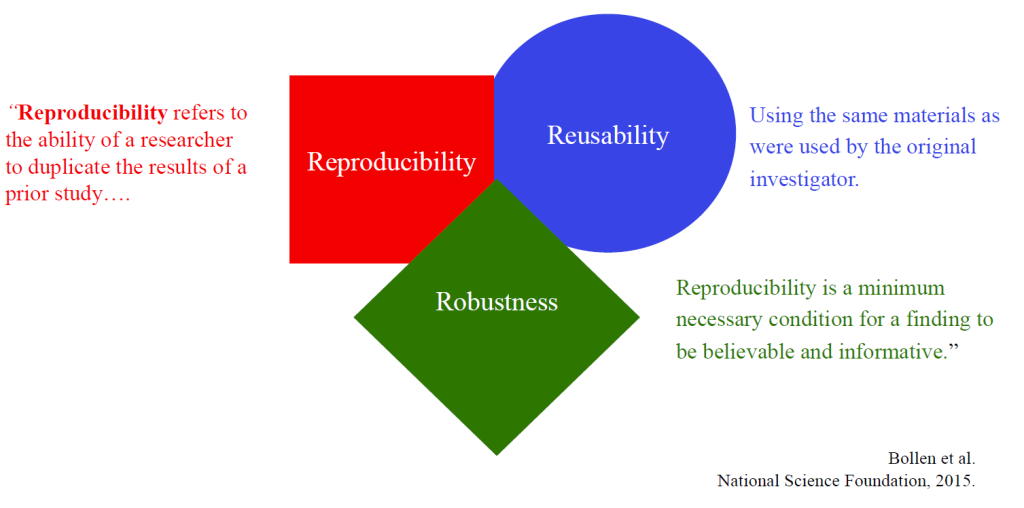
</div>

Feel free to have a look at this reading; 

- https://syncedreview.com/2019/09/26/reproducibility-challenges-in-machine-learning-for-health/ <+>

As our first steps, the following code simply guarantees that the output of this note-book is identical at each run since we are fixing the value in the numpy random seed about the state of randomness. This ensures that, every step including randomness, will exactly produces the same output throughout the whole script when we re-run the code snippets later on. 

In [2]:
# To make this notebook's output identical at every run
np.random.seed(42)
# Or any other number that you prefer inside of np.random.seed() in general such as
# np.random.seed(11205) 

### Funny Story about the number 42

<div>
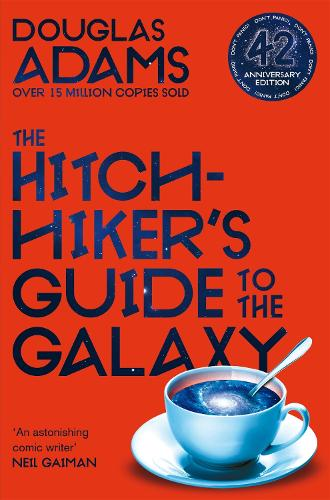
</div>

In Douglas Adams’s popular 1979 science-fiction novel *The Hitchhiker’s Guide to the Galaxy*, towards the end of the book, the supercomputer **Deep Thought** reveals that the answer to the great question of “life, the universe and everything” is 42.

__[Seven and a half million years later…. Fook and Lunkwill are long gone, but their descendants continue what they started]__

- “All right,” said Deep Thought. “The Answer to the Great Question…”

- “Yes..!”

- “Of Life, the Universe and Everything…” said Deep Thought.

- “Yes…!”

- “Is…” said Deep Thought, and paused.

- “Yes…!”

- “Is…”

- “Yes…!!!…?”

- “Forty-two,” said Deep Thought, with infinite majesty and calm.”

__Douglas Adams, The Hitchhiker’s Guide to the Galaxy__

>- Certainly, 42 is not the only choice but when you fix the random seed to some fixed value, you should stick to it for the whole script. 
>- In terms of reproducibility issue, if we run the same code with the same seed number, we will able to produce the same output.

To get further insight about the random seed, consider the following data spliting example with and without the `np.random.seed(42)`. For this illustration, firstly, a syntetic data frame is generated with a single feature by `make_regression`. Only 10 observations are generated for this illustration below.

- You can simply define your `random_state`, by setting to a fixed number OR you can use `np.random.seed(42)` before creating your data, as an alternative. 

In [3]:
from sklearn.datasets import make_regression
# Defining random_state to a fixed number !
X, y = make_regression(n_samples = 10, random_state = 42, n_features = 1, noise = 1)
X

array([[-0.1382643 ],
       [-0.46947439],
       [ 0.76743473],
       [-0.23413696],
       [-0.23415337],
       [ 0.54256004],
       [ 0.49671415],
       [ 1.52302986],
       [ 1.57921282],
       [ 0.64768854]])

In [4]:
np.random.seed(42)
# First defining your random seed and keep random_state=None as it is 
X, y = make_regression(n_samples = 10, random_state = 42, n_features = 1, noise = 1)
X

array([[-0.1382643 ],
       [-0.46947439],
       [ 0.76743473],
       [-0.23413696],
       [-0.23415337],
       [ 0.54256004],
       [ 0.49671415],
       [ 1.52302986],
       [ 1.57921282],
       [ 0.64768854]])

As you can realise, we got exactly the same observations from two ways. Now consider the following data spliting **with** and **without** running the line of `np.random.seed(42)` and examine the differences on the result of data partitioning by looking at the observations selected for training set.

In [5]:
# np.random.seed(42)

from sklearn.model_selection import train_test_split

# Here random_state mainly controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = None)

X_train

array([[-0.1382643 ],
       [ 1.52302986],
       [ 0.76743473],
       [ 0.64768854],
       [-0.23415337],
       [-0.23413696],
       [ 0.49671415]])

- When you repeatedly run that code **without** `np.random.seed(42)`, the observations stored in the training set is changing always.
- When you first set `np.random.seed(42)` and run the splitting line, training set observations are same all the time even if you run the code snippet over and over again. 
- For sure if you set another number inside of `np.random.seed()`, you got a new result but still, over the repeated runs, you will get the same values in your calculation. For instance, try `np.random.seed(0)`, instead of `np.random.seed(42)` above.  

### Sklearn Suggestion

More general suggestion follows a generic framework to control this kind of randomness. You can find more details from here and some examples about the randomness on cross-validation (https://scikit-learn.org/stable/common_pitfalls.html). 

Especially, if we are dealing with multiple consecutive executions, the suggested way is the following; 

- In order to obtain reproducible (i.e. constant) results across multiple program executions, we need to remove all uses of `random_state=None`, which is the default.

- Declare your own `rng` variable (random number generator) at the top of the program, and pass it down to any object that accepts a `random_state` parameter. You can check some details from here; https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html

Let us think about the following example, in the light of this general recommendation. It includes some modeling steps but for the moment, just try to focus on the role of `random_state=None`. 

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# Defining your own random number generator 
rng = np.random.RandomState(0)

X, y = make_classification(random_state = rng)
rf = RandomForestClassifier(random_state = rng)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rng)
rf.fit(X_train, y_train).score(X_test, y_test)

0.84

- We are now guaranteed that the result of this script will always be 0.84, no matter how many times we run it. 
- Changing the global `rng` variable to a different value should affect the results, as expected.
- If you manipulate any of the `random_state` input argument and assign a different value instead of pre-defined `rng`, you will get different results for sure 

__Take Home Messages:__ 

>- Aware of randomness while you are creating lines of codes. If you need to fix it for the reprodicibility purposes, try to follow above-mentioned general recommendation. 
>- scikit-learn developers do not recommend setting the global numpy seed by calling `np.random.seed(42)`, as we exemplified above. See here for a discussion (https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array/5837352#comment6712034_5837352) for this suggestion. 

## 1.2. Problem

Now, it is time move on to the next step.

> Welcome to Machine Learning Housing Corporation! The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.
>
> **Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.**
>
> The first question to ask your boss is what exactly is the business objective; building a model is probably not the end goal. **How does the company expect to use and benefit from this model?** This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it.
>
> The next question to ask is **what the current solution looks like (if any)**. It will often give you a reference performance, as well as insights on how to solve the problem. Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.
>
> This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 20%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price given other data about that district. The census data looks like a great dataset to exploit for this pur‐ pose, since it includes the median housing prices of thousands of districts, as well as other data.

---

### 🚩 Exercise 1 (CORE)

Using the information above answer the following questions about how you may design your machine learning system.

a) Is this a supervised or unsupervised learning task? 

$ supervised \, learning $

b) Is this a classification, regression, or some other task?

$Regression$

c) What if the downstream system the output of your model will feed into requires a categorical input (e.g., "cheap," "medium," or "expensive"). Will this be the same or different task?

$Different \, task$

## 1.3. Data Download

The data we will be using this week is a modified version of the California Housing dataset. We can get the data a number of ways. The easiest is just to load it from the working directory that we are working on (where we have already downloaded it to).

In [7]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


__Note that__

- Building a small function to download the data and then load it is good practice if in the future you use a database that is updated or your model is deployed in practice (where you may fetch and re-train your model multiple times).
 

## 1.4. Inital Look at the Data Structure

This is not going to be a full EDA, but just to get a quick feel for the data. 

- It is important not to do much here as really this is just going to be used to help us make an appropriate test set. 
- This is __NOT__ to examine patterns between your attributes that could help your model performance - this is called _data snooping_ and could give you an overly optimistic estimate of the generalisation error. 

- **Data snooping** is a form of statistical bias manipulating data or analysis to artificially get statistically significant results. Alternative names are **data dredging**, **data fishing**, **p-hacking**.

<div>
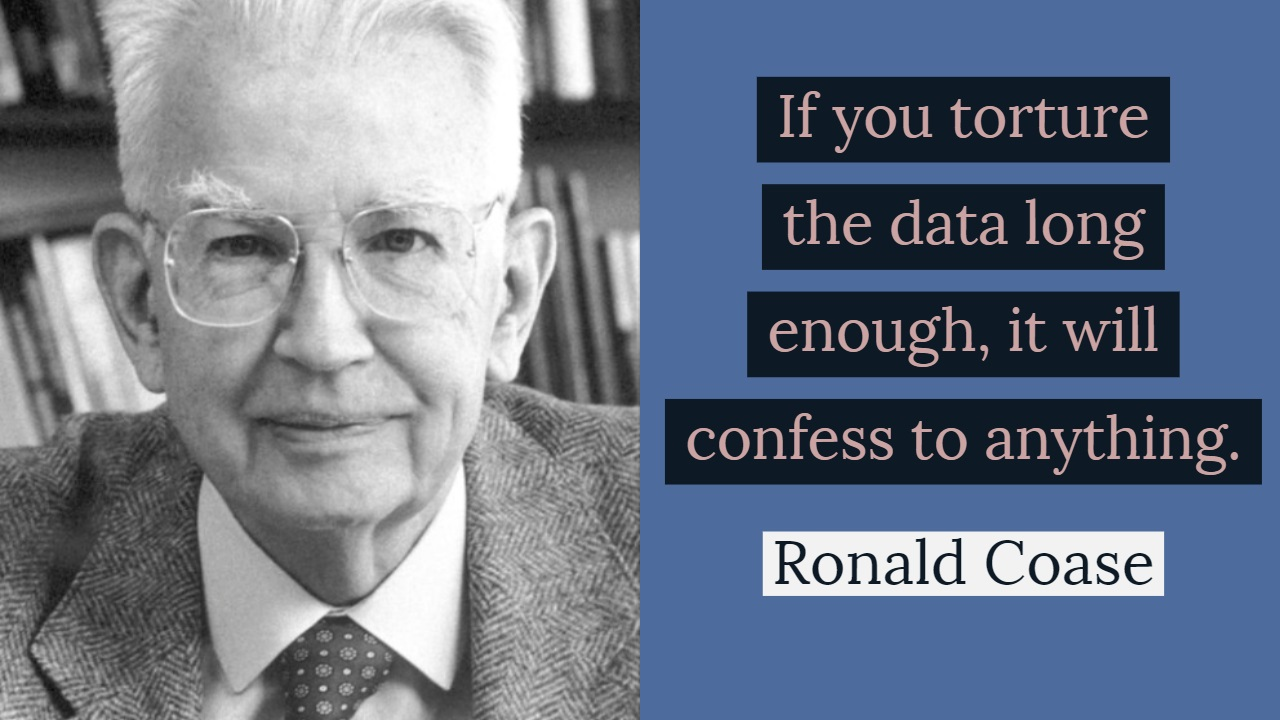
</div>

Anyway, let us first examine the [Data Dictionary](https://www.kaggle.com/camnugent/california-housing-prices).

> `longitude`: A measure of how far west a house is; a higher value is farther west
>
> `latitude`: A measure of how far north a house is; a higher value is farther north
>
> `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
>
> `totalRooms`: Total number of rooms within a block
>
> `totalBedrooms`: Total number of bedrooms within a block
>
> `population`: Total number of people residing within a block
>
> `households`: Total number of households, a group of people residing within a home unit, for a block
>
> `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
>
> `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
>
> `oceanProximity`: Location of the house w.r.t ocean/sea

As we can see above the data has 10 attributes. Lets start examine the data structure using `.info`.

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


---

### 🚩 Exercise 2 (CORE)

From the information provided above, can you anticipate any data cleaning we may need to do?

$ 1.Handling \, missing \, data \, with \, total\,bedrooms \, since \, they \, have \, only \, 20433 \, values \, which\,  indicates \, there \, are \, missing \, values.\,$ 

$ 2.The\, variable\, "ocean\,proximity"\, is\, an\, object\, type,\,we\, can\, determine\, whether\, it\, needs\, to\, be\, transformed\, to\, categorical\, or\, numerical\, variable. $


---

### 🚩 Exercise 3 (CORE)

Using descriptive statistics and histograms to examine the distributions of the numerical attributes, can you identify other pre-processing/feature engineering steps we may need to do?
<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- <code>.describe()</code> can be used to create summary descriptive statistics on a pandas dataframe.
- You can use a <code>sns.histplot</code> to create histograms
    
</details>

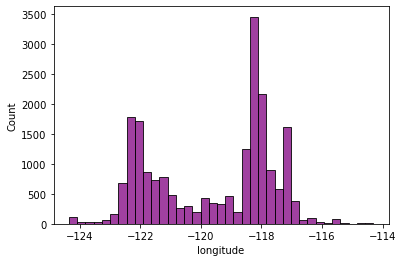

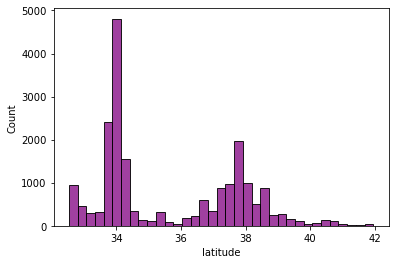

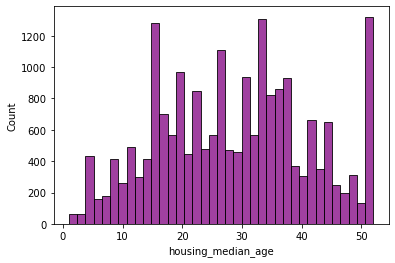

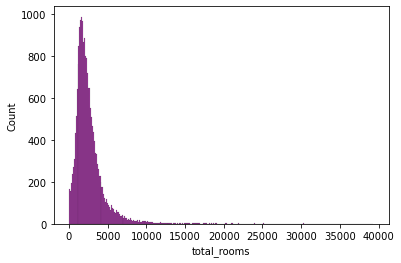

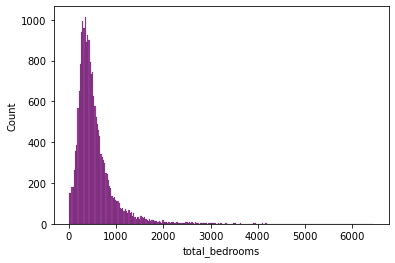

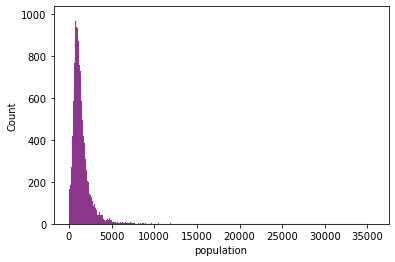

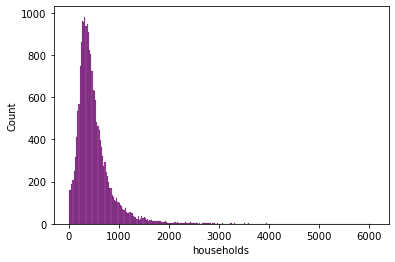

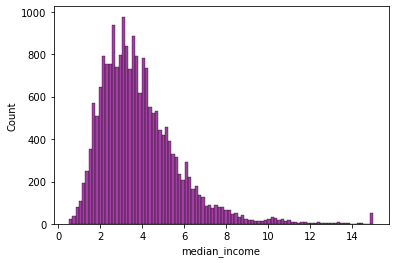

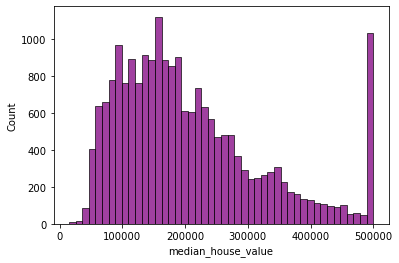

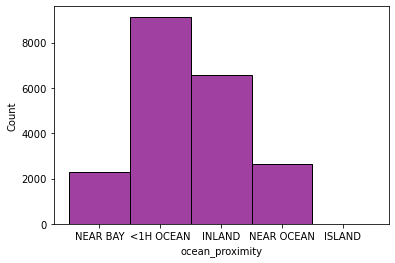

In [13]:
# Create a histogram for each column in your dataframe
for column in housing.columns:
    sns.histplot(data=housing, x=column, color='purple')
    plt.show()

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Other preprocessing that we should do is to deal with null values that total_bedrooms are having, we can also standardise or normalise the values above as by observing the histogram, some of it are not normalised or standardised.

- One thing you may have noticed from the histogram is that the median income, housing median age, and the median house value are capped. 
- The median house value capping (this being our target value) may or may not be a problem depending on your client. 
- If we needed precise predictions beyond $\$500,000$ we may need to either collect proper labels for the districts whose labels were capped or remove these districts from the training and test set. 

In [15]:
# Choosing the cases where median_house_value < 500,000$
housing = housing[housing["median_house_value"] < 500000]

---

### 🚩 Exercise 4 (CORE)

What are the possible categories for the `ocean_proximity` variable?
- Are there a similar number of instances in each category?

In [16]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     8595
INLAND        6523
NEAR OCEAN    2437
NEAR BAY      2088
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
housing['ocean_proximity'].nunique()

5

---

# 2. Creating a Train-Test Set <a id='gen'></a>

There are lots of ways of creating a test set. Last week we used a helpful function from `sklearn.model_selection` called `train_test_split`. Although we didn't go into the details too much then, lets have a look into creating good test sets now using this function. You can have a look at the documentation again; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

>- When **no class labels** are provided, `train_test_split` just defaults to randomly sampling the data to split it into training and validation/test sets (this is what we did last week). 
>- However, this week lets first just split our dataset **without shuffling** for practice using the function. Remember that the default value is `shuffle=True` 

You can visualize the process under two different paths, based on the given input variable as follows

- First split the whole data set into train and test. Thereafter, you can separate your features and labels 

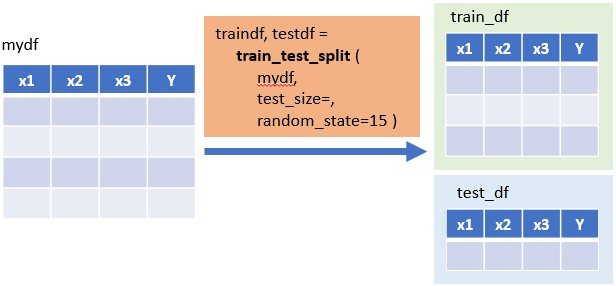

- First separate your whole data into features and labels. Thereafter, you can split them into four main subsets

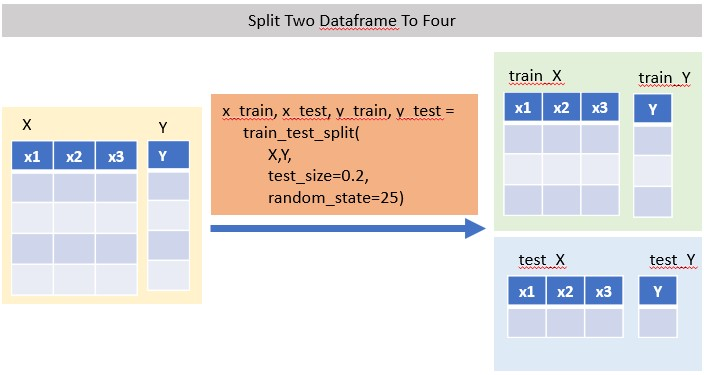

### 🚩 Exercise 5 (CORE)

Use `train_test_split()` to split the data randomly into training (77%) and test (33%) sets **without shuffling** the data first.

- Can you think on a scenario where not shuffling would be a good idea?
- What about when we would want to shuffle our data?

In [18]:
# Necessary module for data spliting from scikit learn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.33, shuffle=False)

We would want to shuffle our data when all the data are perfectly sorted, therefore shuffle is definitely needed when the data are sorted and to obtain a more accurate data.

If the data is time-series data and the observations are ordered in time, then shuffling the data could result in a loss of temporal ordering, which would be important information for the model to learn.

---

`train_test_split` can also do _"stratified splitting"_. What this means is that the data _"is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population"_ based on the class labels.

>- Imagine that an expert tells us that `ocean_proximity` is incredibly important for predicting `median_house_value`. 
>- We may want to ensure that the test set is representative of the various categories of `ocean_proximity`. 
>- Therefore we can use stratified splitting to ensure that the proportions of `ocean_proximity` are similar in the test set to the training set.

__Notes__
- We will use these (`train_set, test_set`) for the rest of the workshop but you could use the next ones (`train_shuf, test_shuf`) as well, you may just get different results.

In [21]:
# Construction of class labels
class_labels = "ocean_proximity"

# Different splitting using the ocean_proximity as the class labels
train_set, test_set = train_test_split(housing, train_size = 0.77, 
                                       stratify = housing[[class_labels]])

As can be seen below, stratified sampling leads to less sampling bias in our test data, compared to shuffled spliting.

In [22]:
def income_cat_proportions(data, variable):
    return data[variable].value_counts() / len(data)

# Data splitting without stratified sample but with shuffling
train_shuf, test_shuf = train_test_split(housing, train_size = 0.77, shuffle = True)

overall = income_cat_proportions(housing, class_labels)
random = income_cat_proportions(test_shuf, class_labels)
strat = income_cat_proportions(test_set, class_labels)

compare_props = pd.DataFrame({
    "Overall": overall.values,
    "Random": random.values,
    "Stratified": strat.values,
}, index = housing.loc[:,class_labels].unique())

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props.round(4)

,Overall,Random,Stratified,Rand. %error,Strat. %error
NEAR BAY,0.4374,0.4385,0.4374,0.2392,-0.0137
<1H OCEAN,0.3320,0.3354,0.3321,1.0257,0.0261
INLAND,0.1240,0.1248,0.1241,0.6013,0.0662
NEAR OCEAN,0.1063,0.1011,0.1062,-4.8595,-0.0712
ISLAND,0.0003,0.0002,0.0002,-13.0619,-13.0619


__Side Notes:__

Stratified sampling is often used on the output varible to ensure representative performance evaluation (particularly when there is a large imballance). In this case our output (`median_house_value`) is a continuous numerical attribute, so first we will have to turn it into stratum.

---

Using `train_test_split`, one can create a stratified split on `median_house_value` after **binning the data** into strata as well. 

__About Binning__
- It is important that there is a sufficient number of instances of data in each stratum (as we may introduce bias), so don't create too many strata.
- If you were to use this set for the rest of the worksheet you would still want to use `median_house_value` as a continuous attribute for our regression model, so make the binned version a new column that you remove after splitting the data.
- It is possible to create such a code snippet using `pd.cut` from pandas library to bin the data (https://pandas.pydata.org/docs/reference/api/pandas.cut.html).


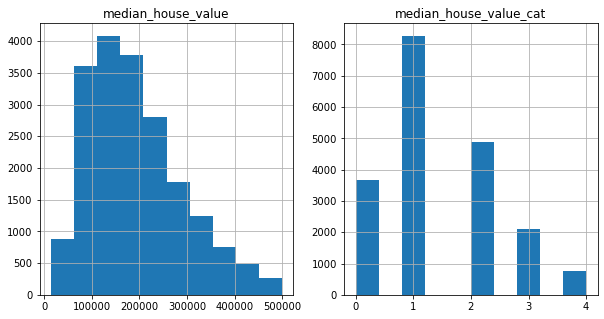

In [23]:
y_attribute = "median_house_value"

housing_ = housing.copy()

housing_[y_attribute + "_cat"] = pd.cut(housing_[y_attribute],
                                      bins = [0., 100000., 200000., 300000., 400000., np.inf],
                                      labels = range(5))

# About illustrating the original response and its binned version
fig, axes = plt.subplots(figsize = (10,5), ncols = 2)
housing_[y_attribute].hist(ax = axes[0])
housing_[y_attribute + "_cat"].hist(ax = axes[1])
axes[0].set_title(y_attribute)
axes[1].set_title(y_attribute + "_cat")
plt.show()

In [24]:
housing[y_attribute].head(10)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: median_house_value, dtype: float64

In [25]:
housing_[[y_attribute + "_cat"]].head(10)

,median_house_value_cat
0,4
1,3
2,3
3,3
4,3
5,2
6,2
7,2
8,2
9,2


In [26]:
# Splitting data in terms of above created binned data intro strate. 
# The key change is on the use of stratify input argument below
train_set, test_set = train_test_split(housing_, train_size=0.77, shuffle = True,
                                        stratify = housing_[[y_attribute + "_cat"]])

# This is the case without using stratify
train_shuf, test_shuf = train_test_split(housing_, train_size = 0.77, shuffle = True)

# The drop() method removes the specified row or column. since axis = 1, it focuses on columns, default value was 0
for set_ in (train_set, test_set):
    set_.drop(y_attribute + "_cat", axis=1, inplace = True)
    
display(train_set.head())
display(train_shuf.head())

# display(test_set.head())
# display(test_shuf.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15784,-122.41,37.78,52.0,1014.0,422.0,1055.0,382.0,1.8519,32500.0,NEAR BAY
14992,-117.03,32.72,38.0,886.0,176.0,505.0,188.0,3.5938,125400.0,NEAR OCEAN
20077,-120.35,38.04,16.0,1499.0,326.0,733.0,286.0,2.5729,118800.0,INLAND
5134,-118.26,33.97,44.0,1246.0,308.0,1031.0,295.0,1.9556,96300.0,<1H OCEAN
19841,-119.10,36.43,24.0,1039.0,190.0,643.0,193.0,2.6711,71300.0,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_cat
7293,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,150000.0,<1H OCEAN,1
16306,-121.36,38.01,16.0,926.0,230.0,451.0,198.0,4.0221,173300.0,INLAND,1
5857,-118.33,34.19,45.0,1505.0,347.0,799.0,319.0,3.1380,217000.0,<1H OCEAN,2
12068,-117.54,33.82,6.0,202.0,29.0,75.0,28.0,4.1250,216700.0,INLAND,2
4618,-118.30,34.07,36.0,2657.0,738.0,2274.0,723.0,3.4250,281700.0,<1H OCEAN,2


---

# 3. Exploratory Data Analysis <a id='eda'></a>

- Now we have a general understanding of the data we now want to look into the training set to get more information we can use for developing our model.

- Lets start by making a copy of our training set to ensure while we explore, we don't accidentally mess with our training data we will use to model.

__Notes__
- If your data is huge, at this stage you may want to create a smaller exploration set.

In [27]:
explore_set = train_set.copy()
explore_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15784,-122.41,37.78,52.0,1014.0,422.0,1055.0,382.0,1.8519,32500.0,NEAR BAY
14992,-117.03,32.72,38.0,886.0,176.0,505.0,188.0,3.5938,125400.0,NEAR OCEAN
20077,-120.35,38.04,16.0,1499.0,326.0,733.0,286.0,2.5729,118800.0,INLAND
5134,-118.26,33.97,44.0,1246.0,308.0,1031.0,295.0,1.9556,96300.0,<1H OCEAN
19841,-119.10,36.43,24.0,1039.0,190.0,643.0,193.0,2.6711,71300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
8045,-118.17,33.85,37.0,3714.0,708.0,1956.0,694.0,4.2218,200500.0,<1H OCEAN
4612,-118.29,34.07,22.0,492.0,269.0,634.0,261.0,1.6406,300000.0,<1H OCEAN
17796,-121.82,37.39,37.0,4137.0,636.0,1569.0,578.0,6.1008,286200.0,<1H OCEAN
6662,-118.13,34.16,52.0,1872.0,357.0,984.0,364.0,4.0000,250400.0,<1H OCEAN


---

### 🚩 Exercise 6 (CORE)

Examine if/which of the features are correlated to each other. Are there any of the features correlated with our output (`median_house_value`) variable?

- Can you think of any reason why certain features may be correlated?

- How might we use this information in later steps of our model pipeline?

In [28]:
corr = explore_set.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925121,-0.104453,0.045884,0.074113,0.106110,0.060073,-0.010988,-0.047222
latitude,-0.925121,1.000000,0.007181,-0.033019,-0.069909,-0.115417,-0.074150,-0.076686,-0.147517
housing_median_age,-0.104453,0.007181,1.000000,-0.376298,-0.330168,-0.297341,-0.311664,-0.196333,0.067100
total_rooms,0.045884,-0.033019,-0.376298,1.000000,0.932144,0.856398,0.919469,0.227247,0.146406
total_bedrooms,0.074113,-0.069909,-0.330168,0.932144,1.000000,0.878403,0.980494,0.022829,0.074859
population,0.106110,-0.115417,-0.297341,0.856398,0.878403,1.000000,0.906915,0.041274,0.012888
households,0.060073,-0.074150,-0.311664,0.919469,0.980494,0.906915,1.000000,0.044784,0.094395
median_income,-0.010988,-0.076686,-0.196333,0.227247,0.022829,0.041274,0.044784,1.000000,0.648097
median_house_value,-0.047222,-0.147517,0.067100,0.146406,0.074859,0.012888,0.094395,0.648097,1.000000


<AxesSubplot:>

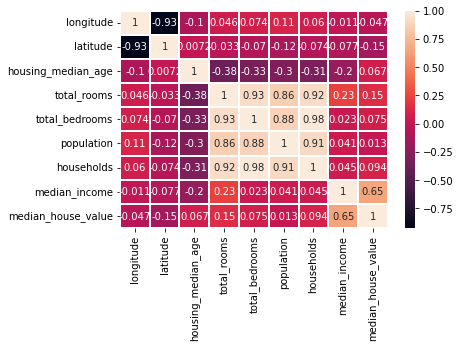

In [29]:
sns.heatmap(data=corr,annot=True, linewidths=.1)

The correlations are latitude and longitute, total rooms and total bedrooms, total rooms and populations, total rooms and households, total bedrooms and population, population and households.

In short, we can compare the correlations of total rooms, total bedrooms, populations, and households. We can see that the longitute and latitude has a high correlation, therefore we can count in it first, before considering removing it.

We can remove those that aren't correlated with the response variable when building our pipeline. 

### 🚩 Exercise 7 (CORE)

- Which variables in our data are classed as counts and how are they distributed ?

- What about the categorical type variables in the given data set ?

In [30]:
explore_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15128.000000,15128.000000,15128.000000,15128.000000,14972.00000,15128.000000,15128.000000,15128.000000,15128.000000
mean,-119.571146,35.655360,28.397673,2616.746893,538.94483,1441.471642,501.120505,3.676625,192033.427882
std,2.005241,2.148018,12.521384,2161.441665,417.49898,1133.466385,379.435994,1.567829,97241.413673
min,-124.350000,32.540000,1.000000,2.000000,2.00000,5.000000,2.000000,0.499900,14999.000000
25%,-121.770000,33.930000,18.000000,1440.750000,297.00000,797.000000,282.000000,2.527100,116300.000000
50%,-118.520000,34.280000,28.000000,2111.500000,437.00000,1181.500000,412.000000,3.451150,173800.000000
75%,-118.000000,37.730000,37.000000,3124.000000,649.25000,1750.250000,607.000000,4.572175,247600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.00000,35682.000000,5358.000000,15.000100,499100.000000


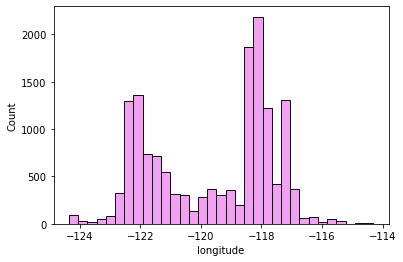

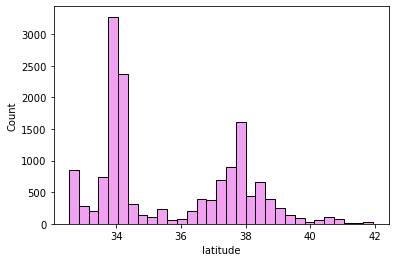

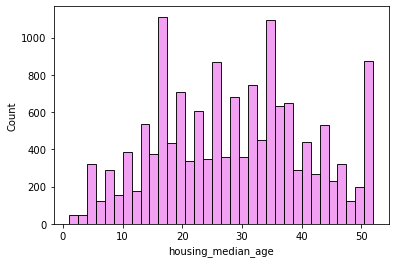

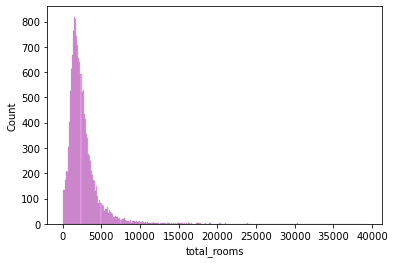

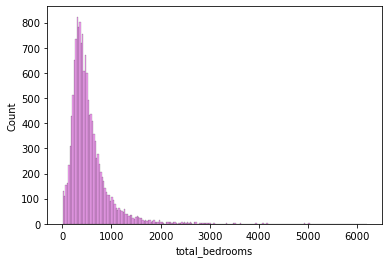

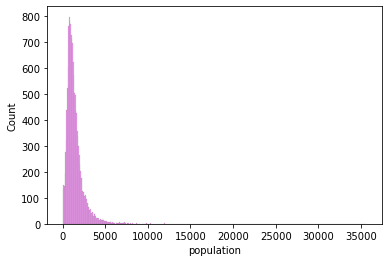

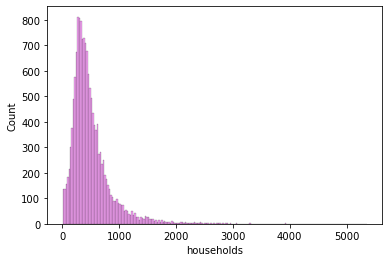

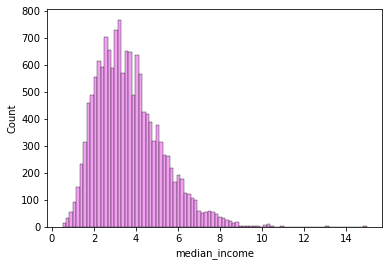

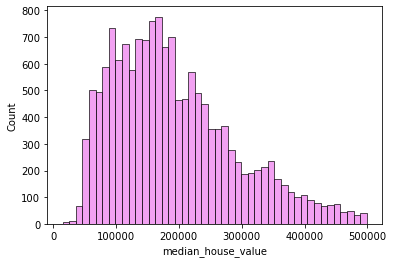

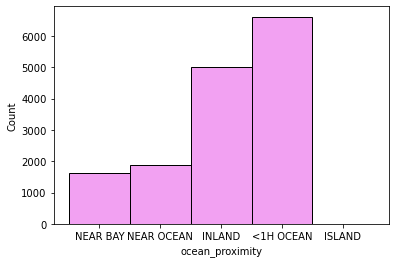

In [31]:
# Create a histogram for each column in your dataframe
for column in explore_set.columns:
    sns.histplot(data=explore_set, x=column, color='violet')
    plt.show()


In [32]:
explore_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15128 entries, 15784 to 7519
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15128 non-null  float64
 1   latitude            15128 non-null  float64
 2   housing_median_age  15128 non-null  float64
 3   total_rooms         15128 non-null  float64
 4   total_bedrooms      14972 non-null  float64
 5   population          15128 non-null  float64
 6   households          15128 non-null  float64
 7   median_income       15128 non-null  float64
 8   median_house_value  15128 non-null  float64
 9   ocean_proximity     15128 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


---

# 4. Data Cleaning <a id='clean'></a>

Last week, because we were using `feature_engine` for convienience for some pipeline steps, we were not very specific about the output type from the functions. Hoever, this week we are going to adhere more to the **Scikit-Learn Design principles** when creating our pipeline steps.

>- __Nonproliferation of classes__. Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.
>- This means all our functions this week are going to **input and output Numpy arrays**. You can of course use pandas functions if you wish in your function, but just make sure that you convert the data back to output the Numpy array object! 
>- Otherwise, in some stpes, there might appear some object/data type errors

Lets start by splitting our **features** from our **target** variable in the training set.

In [33]:
# Extracting the features from the train set
X_train = explore_set.drop("median_house_value", axis = 1)
features = list(X_train.columns)
print(features)

X_train = X_train.values
print(X_train) # Or display(X_train)
print(X_train.shape)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
[[-122.41 37.78 52.0 ... 382.0 1.8519 'NEAR BAY']
 [-117.03 32.72 38.0 ... 188.0 3.5938 'NEAR OCEAN']
 [-120.35 38.04 16.0 ... 286.0 2.5729 'INLAND']
 ...
 [-121.82 37.39 37.0 ... 578.0 6.1008 '<1H OCEAN']
 [-118.13 34.16 52.0 ... 364.0 4.0 '<1H OCEAN']
 [-118.26 33.91 39.0 ... 193.0 2.4375 '<1H OCEAN']]
(15128, 9)


In [34]:
y_train = explore_set["median_house_value"].copy()
y_train = y_train.values

print(y_train) # Or display(y_train)
print(y_train.shape)

[ 32500. 125400. 118800. ... 286200. 250400. 101900.]
(15128,)


---

## 4.1. Detecting Duplications

As we did last week, lets first look for duplicated observations.

### 🚩 Exercise 8 (CORE)

Are there any duplicated values in the training set? 
- If so how many?

In [35]:
dataframe = pd.DataFrame(X_train)
dataframe.duplicated().sum()

0

---

## 4.2. Outlier Detection

An **Outlier** is a rare chance of occurrence within a given data set. Basically, we will just use basic statistics in order to try to identify outliers. In general, it is good to know about examining outliers at this step. 

For this purpose, we will start with a simple visualization (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html). 
Here, the boxplot divides the data into quartiles and visualizes them in a standardized manner, as follows;

<div>
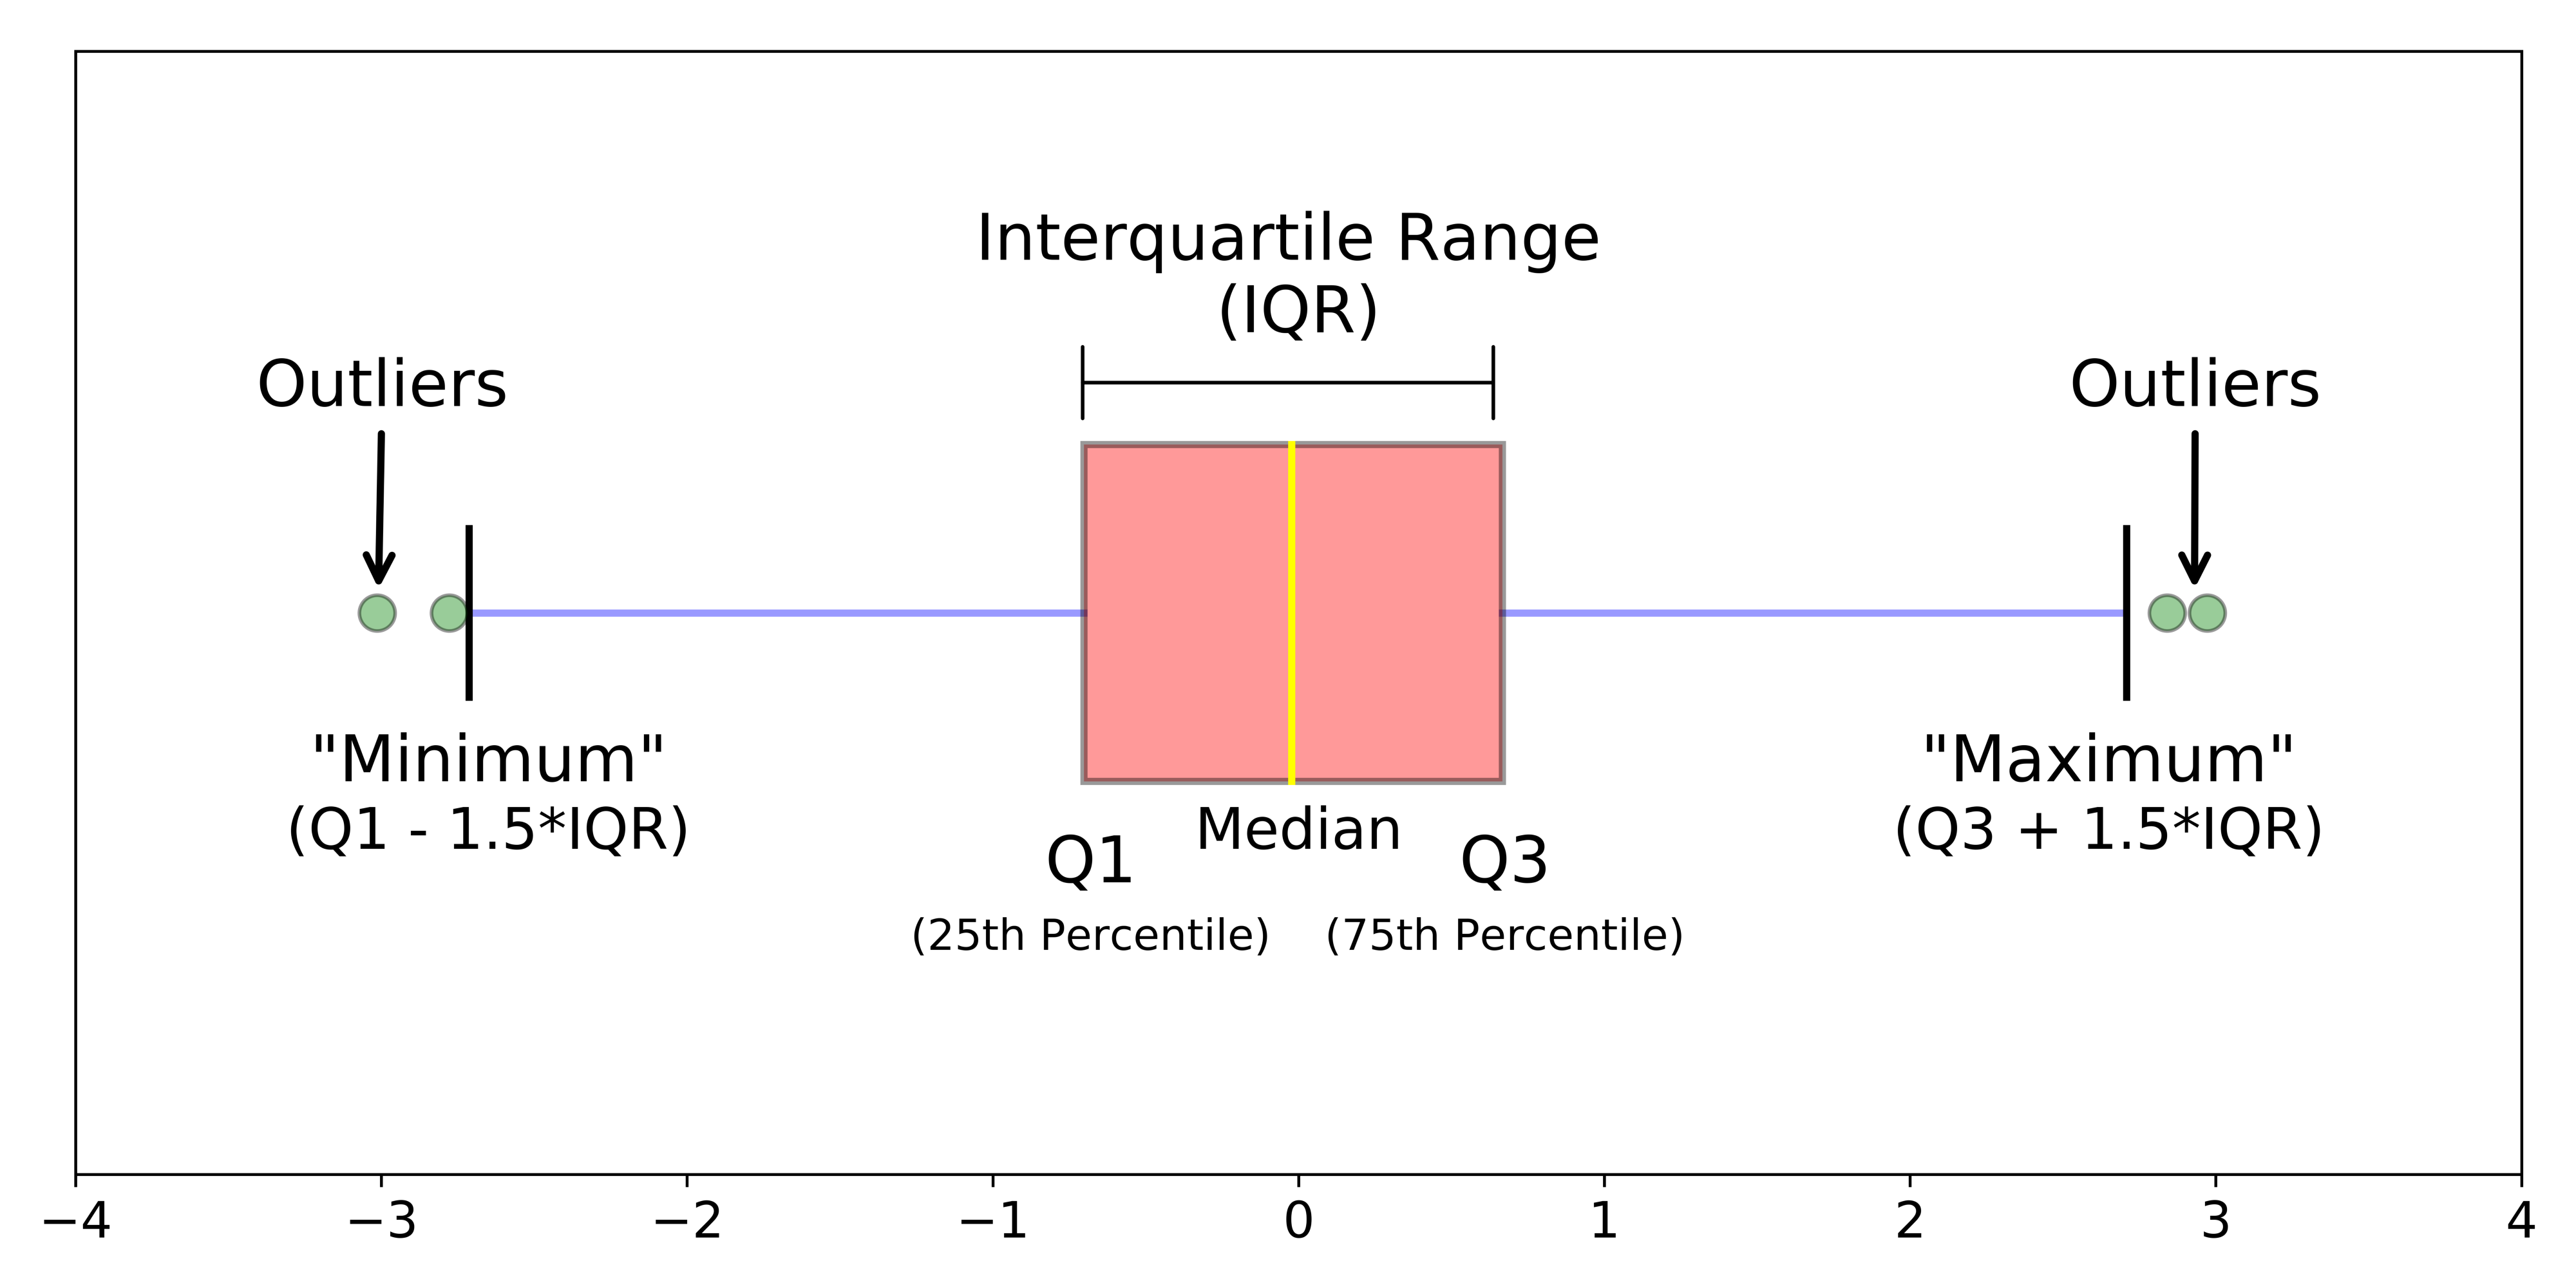
</div>

What we can see here is a kind of rare observations that we can interpret as possible outliers in the data set. However, this is not always a wise decision to drop these observations without explicitly testing that they are really outliers or not.  

Following up the boxplot representation, a simple method of detecting outliers is to use the **inter-quartile range (IQR) proximity rule** (Tukey fences) which states that a value is an outlier if it falls outside these boundaries:

- Upper boundary = 75th quantile + (IQR * $k$) 

- Lower boundary = 25th quantile - (IQR * $k$)

where IQR = 75th quantile - 25th quantile (horizontal length over the box). Herein, $k$ is a nonnegative constant which is typically set to 1.5. However, it is also common practice to find extreme values by multiplying the IQR by 3.

---

### 🚩 Exercise 9 (CORE)

Can you identify any potential outliers using the generated boxplots below ?

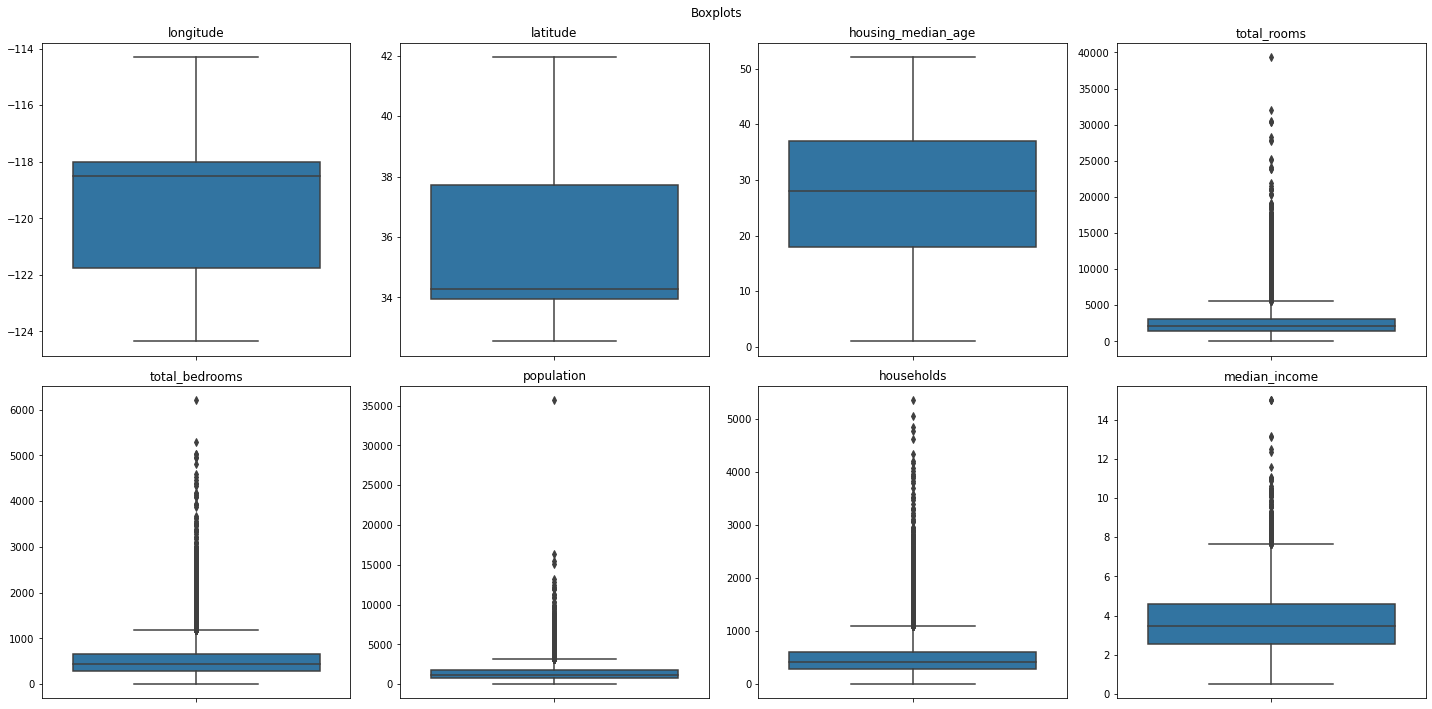

In [36]:
fig, axes = plt.subplots(figsize = (20,10), ncols=X_train.shape[-1]//2, nrows=2, sharex=True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(y=X_train[:,i], ax = ax) 
    ax.set_title(features[i])
    ax.set_ylabel("")
    
plt.suptitle("Boxplots")
plt.tight_layout()
plt.show()

$ As \, we\, can\, see,\, most\, of\, the\, subplots\, above\, have\, outliers.\, The\, potential\, outliers\, are\, total\, rooms,\, total\, bedrooms,\, populations,\, households\, and\, median\, income\, $

---

- After detecting outliers we may want to set them to NA values so we can use subseqent methods to either remove them (NA Removal) or impute their values (Data Imputation). 

- As mentioned last week, it is a good idea to make our methods into functions that are compatible with scikit-learn, so that we can use them in a `Pipeline` later on. 

- The removal of outliers is NOT an easy task, not necessarily be applied all the time if you are interested in rare events and without any statistical examination by using suitable testing tools, it is not reasonable to remove these observations just by looking at the above boxplots. 

- Another issue might be related to the sample size of your data set. Even if `housing` data set has enough size, in some cases, when you drop those observations you can waste important information unwittingly!

**For the sake of simplicity, we are keeping the all observations at that moment for this workshop.** 

---

## 4.3. NA Removal

Most ML models cannot handle missing values, and as we saw earlier, there are some present in `total_bedrooms`. 

There are a number of ways we can deal with missing values but to start with, lets just **remove NA values**. 
We can do this in two ways by either:

1. Get rid of the corresponding observations (deleting the corresponding rows).
2. Get rid of the whole attribute (deleting the corresponding columns).

To do this outside of a pipeline is relatively straight forward, we just run `train_set.dropna()` with either the `axis` set to `0` or `1` (depending if we want to remove rows or columns) before splitting our data into feature (`X_train`) and labels (`y_train`). 

However if we want to do this in a pipeline we can use the `FunctionSampler` from `imblearn`, as we did last week. Your function may have looked a bit like below:

In [37]:
# Install the imblearn library first by
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [38]:
# Necessary module from imblearn
from imblearn import FunctionSampler

def drop_na(X, y, axis = 0):
    data = np.concatenate([X,y.reshape(-1,1)], axis=1)
    df = pd.DataFrame(data)
    
    # using dropna instead of numpy as already handles lots of
    # data types so we can put all our data in.
    df = df.dropna(axis = axis)
    
    data = df.values
    
    return data[:,:-1], data[:,-1]

In [39]:
na_sampler = FunctionSampler(func = drop_na,    # our custom function
                             validate = False)  # prevents both inputs being changed to numpy arrays
X_train_, y_train_ = na_sampler.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_train_.shape)
print(y_train_.shape)

(15128, 9)
(15128,)
(14972, 9)
(14972,)


As we discussed last week, to create a custom resampler, all you need is to create a class that implements three methods: `fit()`, `resample()`, and `fit_resample()`. Therefore you could also write it like the following, in a different format by following three methods consecutively;

__Note__
- If you add `BaseEstimator` as a base class (and then avoid using `*args` and `**kargs` in your constructor) you will also be able to use the methods `get_params()` and `set_params()`, which can be useful if you intend to use hyperparameter tuning<sup>1</sup>.
- As `samplers` are only applied to the data during training, you cannot use them when making predictions. Therefore you'll have to make sure your test set does not have NA's outside of your pipeline.

In [40]:
# Necessary module from sklearn
from sklearn.base import BaseEstimator

class NARemover(BaseEstimator):
    def __init__(self, axis=0): # no *args or **kargs
        """
        Axis: Determine if rows or columns which contain missing values are removed.
        0, or ‘index’ : Drop rows which contain missing values.
        1, or ‘columns’ : Drop columns which contain missing value.
        """
        self.axis = axis
    
    def fit(self, X, y):
        return self  # nothing to do
    
    def resample(self, X, y):
        # copy to not alter input
        X_ = X.copy()
        y_ = y.copy()
        
        # turn to a numpy array if a pandas df
        if isinstance(X_, pd.DataFrame):
            X_ = X_.values
        if isinstance(y_, pd.DataFrame):
            y_ = y_.values.flatten()

        X_, y_ = drop_na(X_, y_, axis=self.axis)

        return X_, y_
        
    def fit_resample(self, X, y=None):
        self.fit(X, y)
        return self.resample(X, y)

---

### 🚩 Exercise 10 (CORE)

Using either the `na_sampler` or `NARemover` above, remove any observations with missing data in any of the variables.

- You may also want to try observing the similarities or dissimilarities between the outputs of two approaches 

In [41]:
X_train_, y_train_ = na_sampler.fit_resample(X_train, y_train)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_train_.shape)
print(y_train_.shape)

(15128, 9)
(15128,)
(14972, 9)
(14972,)


In [43]:
pd.DataFrame(X_train_).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

## 4.4. Data Imputation (EXTRA)

Instead of removing the missing data we can set it to some value. To do this, Scikit-Learn gives us a handy `SimpleImputer` method which provides a number of stategies (e.g. `"mean"`, `"median"`).

In [44]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")

X_train_imp = num_imputer.fit_transform(X_train)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'NEAR BAY'

When we just applied this to our training data now we will get an error.

```
ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 
```

This is because the "median" strategy can only be used with numerical attributes so we need a way of only applying imputation to certain attributes. As with most things in Python, there are a number of options available to us (you may have already used one of them in answers to previous questions): 

- We could temporarily remove the categorical feature from our data to apply our function
```
X_train_num = X_train[:,:-1]
X_train_num = num_imputer.fit_transform(X_train_num)
```
- Apply the function to a subset of the data and assign the output to the same subset 
```
X_train[:,:-1] = num_imputer.fit_transform(X_train[:,:-1])
```

However scikit-learn has a handy function to specify what column we want to apply a function to (its also compatible with `Pipeline`'s as well).

In [45]:
from sklearn.compose import ColumnTransformer

num_cols_imputer = ColumnTransformer(
    # apply the `num_imputer` to all columns apart from the last
    [("num", num_imputer, list(range(X_train.shape[1] - 1)))],
    # don't touch all other columns, instead concatenate it on the end of the
    # changed data.
    remainder = "passthrough"
) 

X_train_ = num_cols_imputer.fit_transform(X_train)
print("Number of Missing Values")
pd.DataFrame(X_train_, columns = features).isna().sum()

Number of Missing Values


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

After using `.fit` we can see that this method stores the median value for each attribute on the training set. This value can be used when validating and testing the model as it will be used if there is missing data in the new data.

__Note__
- To access the fitted `num_imputer` in this case, you first needed to subset the `transformers_` in `ColumnTransformer` to only the first tuple (`[0]`), and then get the second object (`[1]`) in the list (the `num_imputer`).

In [46]:
display(num_cols_imputer.transformers_[0][1].statistics_)

array([-118.52   ,   34.28   ,   28.     , 2111.5    ,  437.     ,
       1181.5    ,  412.     ,    3.45115])

---

# 5. Feature Engineering <a id='engin'></a>

As discussed in the lectures, feature engineering is where we extract features from data and transform them into formats that are suitable for machine learning models. Basically, we will have a look at two main cases below; **categorical** and **numerical** values that we have

## 5.1. Categorical Variables

- In the dataset we have an text attribute (`ocean_proximity`) we have already had to treat differently when cleaning the data. This extends to feature engineering as well, where we need to use separate methods than those used with numerical variables.

- If we look at the unique values of this attribute, we will see that there are a limited number of possible values which represent a category. We need a way of encoding this information into our modeling framework **by converting our string/categorical variable into a numeric representation** that can be included in our models.

If we have a binary categorical variable (two levels) we could do this by picking one of the categorical levels and encode it as 1 and the other level as 0. 

>- To do this in Python, we can compare our categorical vector to the value of our choice and then cast (convert) the result to an integer type. 
>- In the example below, imagine for the purposes of our model we only wanted to know if the property was "inland" or not, then we could do the following.

In [47]:
X_train_ = X_train.copy() # so we don't overwrite our training data
X_train_[:,-1] = (X_train_[:,-1] == "INLAND").astype(int) # Returns either 0 or 1

print("Original Data")
display(X_train[:, -1]) # -1 is just about reverse indexing to select only ocean_proximity variable 
print("Encoded Data")
X_train_[:, -1]

Original Data


array(['NEAR BAY', 'NEAR OCEAN', 'INLAND', ..., '<1H OCEAN', '<1H OCEAN',
       '<1H OCEAN'], dtype=object)

Encoded Data


array([0, 0, 1, ..., 0, 0, 0], dtype=object)

---

In this case as we have multiple categories, we would probably want to use another encoding method. To illustrate, we can try encoding the the categorical feature `ocean_proximity` using both the `OrdinalEncoder` and `OneHotEncoder` available in `sklearn.preprocessing`.

__Side Notes__

- The output of the `OneHotEncoder` provided in Scikit-Learn is a SciPy _sparse matrix_, instead of a NumPy array. These are useful when you have lots of categories as your matrix becomes mostly full of 0's. To store all these 0's takes up unneccesary memory, so instead a sparse matrix just stores the location of nonzero elements. The good news is that you can use a sparse matrix similar to a numpy matrix, but if you wanted to, you can convert it to a dense numpy matrix using `.toarray()`<sup>1</sup>.

- The above does not seem to be the case if passed through a `ColumnTransformer`.

In [48]:
from sklearn.preprocessing import OrdinalEncoder
# Defining the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

encoder = ColumnTransformer([
    # apply the `num_imputer` to all columns apart from the last
    ("num", "passthrough", list(range(X_train.shape[1] - 1))), 
    # apply the `cat_imputer` to the last column, ordinal_encoder
    ("cat", ordinal_encoder, [X_train.shape[1] - 1]),
])

# fitting the encoder defined above
housing_cat_encoded = encoder.fit_transform(X_train) 

display(dict(zip(list(encoder.transformers_[1][1].categories_[0]), range(5))))

{'<1H OCEAN': 0, 'INLAND': 1, 'ISLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}

In [49]:
from sklearn.preprocessing import OneHotEncoder
# Defining the OneHotEncoder
OHE = OneHotEncoder()

encoder = ColumnTransformer([
    # apply the `num_imputer` to all columns apart from the last
    ("num", "passthrough", list(range(X_train.shape[1] - 1))), 
    # apply the `cat_imputer` to the last column, OHE
    ("cat", OHE, [X_train.shape[1] - 1]),
]) 

housing_cat_1hot = encoder.fit_transform(X_train) 
cats = pd.Series(X_train[:,-1]).unique()
pd.DataFrame(encoder.transformers_[1][1].transform(cats.reshape(-1, 1)).toarray(), columns = cats).astype(int)

,NEAR BAY,NEAR OCEAN,INLAND,<1H OCEAN,ISLAND
0,0,0,0,1,0
1,0,0,0,0,1
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


### 🚩 Exercise 11 (CORE)

- What is the main difference between two methods regarding the obtained output ?

- Which encoding method do you think is most appropriate for this variable and why?

The difference between OrdinalEconder and OneHotEncoder is that OrdinalEconder requires a relationship between the categories, whereas OneHotEncoder can be applied on weak or no relationship between the catogaries. In this situation, we can clearly see that <1H OCEAN	INLAND	NEAR OCEAN	NEAR BAY ISLAND has no relationships with each other, therefore OneHotEncoder would be preferred here.

## 5.2. Numerical Variables

### 5.2.1. Box-Cox Transformation

In some cases, we may wish to apply transformations to our data (e.g. `LogTransform`). In particular, the natural logarithm, square root, and inverse transformations are special cases of the more general **Box-Cox** family of transformations (Box and Cox 1964). The question is why do we need such a transformation and when ? 

- Note that, the method generally applies to transformation of the outcome, but possible to consider for predictors. 

- The method assumes that the variable takes values are all positive. If there are a few zero or negative values, a modification of the Box-Cox that allows non-positive values (Box-Cox with negatives, BCN) can be used (Hawkins and Weisberg 2017). 

- If there are zero values, but no negative values, as mentioned previously an option is to add a small number before carrying out the transformation, although if there are a large number of zero values then it is possible no Box-Cox transformation will sufficiently normalize the residuals or stabilize the variance of the residuals.

As an example, you can see (Credit for Figure: https://bookdown.org/max/FES/numeric-one-to-one.html ) the impact of inverse transform over a skewed predictor here with ($\lambda = -1.09$);

<div>
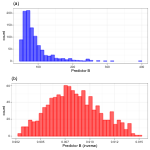
</div>


Originally, the Box-Cox procedure is intended as a transformation of a model’s outcome, uses maximum likelihood estimation to estimate a transformation parameter $\lambda$.

$y^{*} = \left\{ \begin{array}{l l} \frac{y^{\lambda} - 1}{\lambda}, & \lambda \neq 0 \\ \log y, & \lambda = 0 \\ \end{array} \right.$

- $\lambda$ is estimated from the data. 

- Because the parameter of interest is in the exponent, this type of transformation is called a power transformation

- Some values of $\lambda$ map to common transformations, such as;
    >* $\lambda = 1$ (no transformation)
    >* $\lambda = 0$ (log)
    >* $\lambda = 0.5$ (square root)
    >* $\lambda = -1$ (inverse)

- Using the code below, if `lmbda=None` then the function will "find the lambda that maximizes the log-likelihood function and return it as the second output argument"

- Notice that we can not use `lambda` directly since it conflicts with the available object called `lambda`, this is the reason we preferred the indicator name as `lmbda`

In [50]:
X_train[:,6]

array([382.0, 188.0, 286.0, ..., 578.0, 364.0, 193.0], dtype=object)

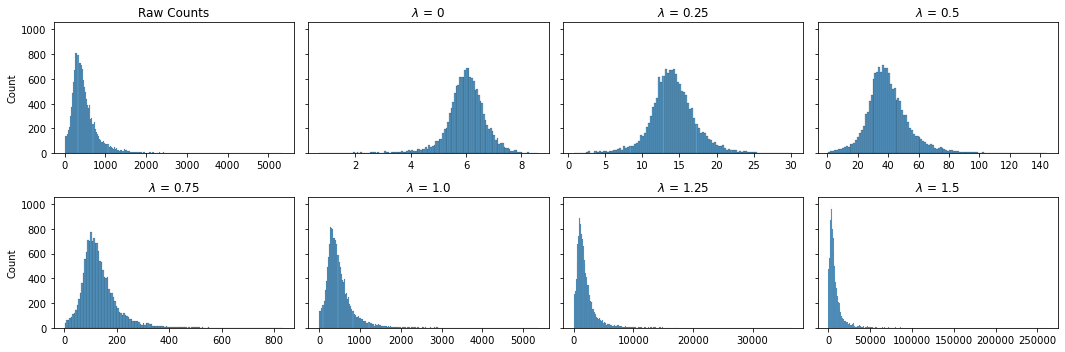

In [51]:
from scipy import stats

fig, axes = plt.subplots(figsize = (15,5), ncols = 4, nrows=2, sharey = True)
axes = axes.flatten()
sns.histplot(data = X_train[:,6], ax = axes[0])
axes[0].set_title("Raw Counts")

for i, lmbda in enumerate([0, 0.25, 0.5, 0.75, 1., 1.25, 1.5]):
    
    house_box_ = stats.boxcox(X_train[:, 6].astype(float), lmbda = lmbda)
    sns.histplot(data = house_box_, ax = axes[i + 1])
    axes[i + 1].set_title("$\lambda$ = {}".format(lmbda))
    
plt.tight_layout()
plt.show()

### 🚩 Exercise 12 (CORE)

Using the variable `households`, by the `boxcox` transform from `scipy.stats`, 
<br>

- Examine a few different values of $\lambda$ and decide which may be useful. 

- What about the result for `median_house_value` when the similar code snippet applied with the same values of $\lambda$?  

By examining the different values of $\lambda$, we can see that as the $\lambda$ increases, the households are skewed towards the left. Therefore, the normal distibuted one would definitely be more useful, therefore $\lambda=0.25$ will be the useful one, as it is normal distibuted about the mean for median house value

---

### 5.2.2. Feature Combinations

- Looking at the datas attributes we may also want to manually combine them into features that are either a more meaningful representation of the data or have better properties.

- For example, we know **the number of rooms** in a district, but this may be more useful to combine with the **number of households** so that we have **a measure of rooms per household**.

In [52]:
col_names = "total_rooms", "households"
rooms_ix, households_ix = [explore_set.columns.get_loc(c) for c in col_names] 

rooms_per_household = X_train[:, rooms_ix] / X_train[:, households_ix]
rooms_per_household

array([2.654450261780105, 4.712765957446808, 5.241258741258742, ...,
       7.157439446366782, 5.142857142857143, 4.844559585492228],
      dtype=object)

---

### 🚩 Exercise 13 (EXTRA)

- Can you think of other combinations that may be useful?

- Create a custom transformer that creates these new combinations of features using the `FunctionTransformer`.

<br />
<details><summary><b><u>Hint</b></u></summary>
What about the following?
   
- `population_per_household`
    
- `bedrooms_per_room`
</details>

---
We may also want to create interactions or polynomal features, particularly if we plan on using a linear model on data that has non-linearities. For example, using `PolynomialFeatures` from `sklearn.preprocessing`, it is possible add polynomial features to your training set.

- You may wish to only use this for the interaction features (`interaction_only = True`)

__Note__
- If you are planning on using a model such as `LinearRegression` after, you probably want to set `include_bias=False` to ensure you do not create rank deficiency in your model matrix (discussed more in week 5).

- `PolynomialFeatures` can output the feature names with `.get_feature_names()` provided you give the original names.

- Bear in mind that you need to remove the NA's first.

### 5.2.3. Feature Scaling

As we saw before, particularly for the count data, there is quite a range of feature maginitudes present in the data (e.g. the total number of rooms ranges from about 6 to 39,320).

/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


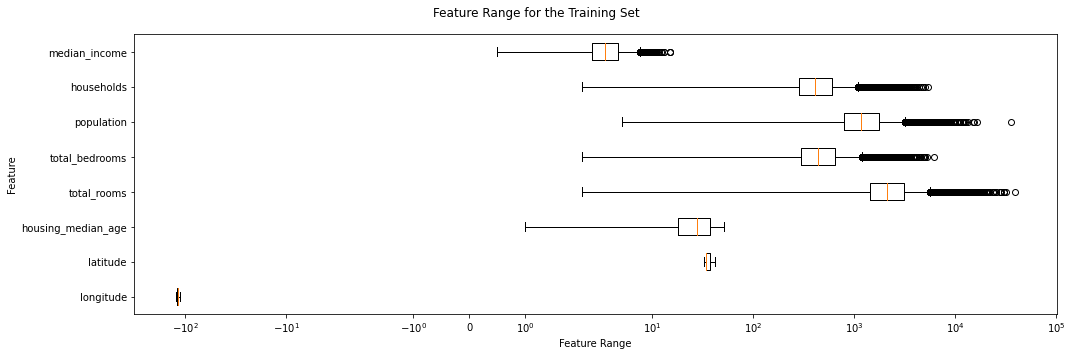

In [60]:
fig, ax = plt.subplots(figsize=(15,5))

plt.boxplot(X_train[:,:-1], vert = False) 
plt.xscale("symlog") 
plt.ylabel("Feature") 
plt.xlabel("Feature Range")

ax.set_yticklabels(features[:-1])

plt.suptitle("Feature Range for the Training Set")
plt.tight_layout()
plt.show()

Especially, when you have the features with varying range, this might impact your model performance. We have various options in scikit learn, 

- Standardization (`preprocessing.StandardScaler`)

- Min-Max Scaling (`preprocessing.MinMaxScaler`)

- l2 Normalization (`preprocessing.normalize`)

- RobustScaler(`preprocessing.RobustScaler`)

- Scale with maximum absolute value (`preprocessing.MaxAbsScaler`)

>- As scaling generally improves the performance of most models when features cover a range of scales, it is probably a good idea to apply some sort of scaling to our data before fitting a model. 
>- Last week we used *standardization* (or *variance scaling*), which is quite common, but there are a number of other types, as listed above

---

### 🚩 Exercise 14 (EXTRA)

Try implementing the different scalers yourself over the `total_rooms` variable to see the main differences on the obtained output 

---
# 6. Summary <a id='sum'></a>

This week we covered a lot of ground! since 

- We've looked at some methods for pre-processing our data, cleaning and preparing it, as well as how to engineer some features. 

- This is by **no means a complete collection of all the methods available** as covering more would go beyond the scope of this course (for those interested in learning more, have a look though the given companion readings). 

- For example, we did not touch on handling text and dates/time much. These topics are quite complex and have enough materials to cover their own courses.

---

# 7. After Pre-processing (EXTRA) <a id='extra'></a>

Here are some extra exercises that you can cover after completing the data pre-processing part. Mainly this part requires further knowledge on modeling tools, but good to practice to get a concise understanding of the steps of any ML project. 

## Model Exploration/Refinement

Due to the focus of this week, lets look at combining different feature engineering steps together to make different model pipelines.

- We could create a basic model pipeline that treats the **numerical** and **categorical** attributes differently. 
- To achive this we are going to use a combination of `Pipeline` and `ColumnTransformer` objects.

We can of course do this outside of a pipeline, but remember to be careful about information leak (see last weeks workshop).

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
set_config(display='diagram')

num_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_scale", StandardScaler())])

cat_pre = Pipeline([
    ("cat_impute", SimpleImputer(strategy="constant")),
    ("cat_encode", OneHotEncoder())])

reg_pipe_1 = Pipeline([
    ("pre_processing", ColumnTransformer([("num_pre", num_pre, list(range(X_train.shape[1]-1))),
                                          ("cat_pre", cat_pre, [X_train.shape[1]-1])])),
    ("model", LinearRegression())
])

reg_pipe_1

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('num_pre',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7]),
                                                 ('cat_pre',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('cat_encode',
                                                                   OneHotEncoder())]),
                                                  [8])])),
                ('model', LinearRegression())])

---

### 🚩 Exercise 15 (EXTRA)

Using the pipeline above, use **cross-validation** to assess the performance ($R^2$) of a linear regression model.

In [62]:
from sklearn.model_selection import cross_validate

# tidy the output into a dataframe
def tidy_scores(score_dict):
    df = pd.DataFrame(score_dict)
    df.loc['mean'] = df.mean()
    df.loc['sd'] = df.std()
    df.rename({"test_score":"val_score"}, axis = 1, inplace = True)
    df.index.name = "fold"
    return df.round(2)

scores = cross_validate(reg_pipe_1, X_train, y_train, cv = 5, scoring=["r2"], return_train_score = True)
tidy_scores(scores)

,fit_time,score_time,test_r2,train_r2
fold,,,,
0,0.03,0.0,0.63,0.61
1,0.03,0.0,0.61,0.62
2,0.12,0.0,0.62,0.62
3,0.10,0.0,0.64,0.61
4,0.18,0.0,0.59,0.62
mean,0.09,0.0,0.62,0.62
sd,0.06,0.0,0.02,0.00


---

### 🚩 Exercise 16 (EXTRA)

Try some other combinations of the pre-processing and feature engineering steps we have learned about this week by combining `Pipeline` and `ColumnTransformer` objects.

In [63]:
# NOTE: ADDITIONAL transformer for the pipeline
# Creating the Transformer for box-cox implementation 
from sklearn.preprocessing import FunctionTransformer

def boxcoxarray(X, y=None, lmbda=None):
    X_ = X.copy()
    for i in range(X.shape[1]):
        if lmbda == None:
            X_[:,i], bc_params_ = stats.boxcox(X_[:,i], lmbda = lmbda)
        else:
            X_[:,i] = stats.boxcox(X_[:,i], lmbda = lmbda)
    return X_

# Creating our transformer from the pre-defined boxcoxarray callable function:
boxtransformer = FunctionTransformer(boxcoxarray, validate = True)

In [64]:
# Reg Pipe 2
num_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_scale", StandardScaler())])

count_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_transform", boxtransformer),
    ("num_scale", StandardScaler())])

cat_pre = Pipeline([
    ("cat_impute", SimpleImputer(strategy="constant")),
    ("cat_encode", OneHotEncoder())])

# Overall ML pipeline inlcuding all 
reg_pipe_2 = Pipeline([
    ("pre_processing", ColumnTransformer([
        ("num_pre", num_pre, [0, 1, 2, 7]), # Applied to the columns/variables in 0, 1, 2, 7 index
        ("count_pre", count_pre, [3, 4, 5, 6]), # Applied to the columns/variables in 3, 4, 5, 6 index
        ("cat_pre", cat_pre, [8])])), # Applied to the columns/variables in 8 index only (ocean_proximity)
        ("model", LinearRegression())
])

display(reg_pipe_2)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('num_pre',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 7]),
                                                 ('count_pre',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_transform',
                                                                   FunctionTransformer(func=<function boxcoxarray at 0x7f0d7a718b80>,
                                                                                       validate=True)),
                                                                  ('num_scale',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6]),
                                                 ('cat_pre',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('cat_encode',
                                                                   OneHotEncoder())]),
                                                  [8])])),
                ('model', LinearRegression())])

In [65]:
scores = cross_validate(reg_pipe_2, X_train, y_train, cv = 5, return_train_score = True)
display(tidy_scores(scores))

,fit_time,score_time,val_score,train_score
fold,,,,
0,0.07,0.02,0.51,0.64
1,0.21,0.02,0.52,0.64
2,0.21,0.02,0.56,0.64
3,0.21,0.02,0.64,0.64
4,0.21,0.02,0.62,0.64
mean,0.18,0.02,0.57,0.64
sd,0.06,0.00,0.05,0.00


---

## Final Model Evaluation

Once we have finished tweeking our models above, we can assess their performance on a test set (un-seen data) to get an idea of their final generalisation performance.

### 🚩 Exercise 17 (EXTRA)

- Assess the final generalisation performance of your prefered model pipeline from above, using the test data set.

- Try to compare the final performance of `reg_pipe_1` and `reg_pipe_2`, over the test data

# Further Readings

1. Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O’Reilly Media.
2. Amr, T. (2020). Hands-On Machine Learning with scikit-learn and Scientific Python Toolkits.
3. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning principles and techniques for data scientists. O’Reilly Media, Inc.